In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1

In [2]:
heartTraindf = pd.read_csv("Part1_dataset/heart-train.csv")
heartTestdf = pd.read_csv("Part1_dataset/heart-test.csv")

### 1. Identify the dataset columns into nominal, categorical, continuous, etc. categories

In [9]:
heartTraindf.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [10]:
heartTraindf.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

By observing the values of each columns, we could conclude as below:

sbp (Systolic blood pressure):
 - Datatype: Continuous

tobacco (Cumulative tobacco consumption, in kg):
 - Datatype: Continuous

ldl (Low-density lipoprotein cholesterol):
  - Datatype: Continuous

adiposity (Adipose tissue concentration):
  - Datatype: Continuous

famhist (Family history of heart disease; 1=Present, 0=Absent):
  - Datatype: Nominal

typea (Score on a test designed to measure type-A behavior):
  - Datatype: Continuous

obesity (Obesity):
  - Datatype: Continuous

alcohol (Current consumption of alcohol):
  - Datatype: Continuous

age (Age of subject):
  - Datatype: Continuous

chd (Coronary heart disease; 1=Yes, 0=No):
  - Datatype: Nominal


_In the case of `Age` column, it sometimes considered as discrete variable. However, in this analysis, we considered it to be continouous variable._ 

### 2. Present insights about the data.

In [22]:
# general statistics for all the coninous columns.

heartTraindf.iloc[:,:-1].describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,139.240291,3.666262,4.589539,25.151214,52.135922,25.802112,18.030073,42.686893
std,20.451903,4.518501,1.883744,7.740794,9.592727,4.081745,25.298909,15.129338
min,101.000000,0.000000,0.980000,6.740000,20.000000,17.890000,0.000000,15.000000
25%,125.500000,0.037500,3.240000,19.397500,46.000000,22.737500,0.447500,30.750000
50%,136.000000,1.805000,4.225000,26.090000,52.000000,25.635000,7.510000,45.000000
75%,148.000000,5.850000,5.527500,30.755000,58.000000,28.167500,24.960000,57.000000
max,218.000000,27.400000,14.160000,42.490000,73.000000,45.720000,145.290000,64.000000


In [26]:
print(heartTraindf['famhist'].value_counts())
print(heartTraindf['chd'].value_counts())

Absent     239
Present    173
Name: famhist, dtype: int64
0    275
1    137
Name: chd, dtype: int64


_**Insight**_



#### Insights from Simple Statistics:
sbp (Systolic Blood Pressure):
 - The average systolic blood pressure is around 139.24 with a standard deviation of 20.45.
 - The minimum blood pressure recorded is 101, and the maximum is 218.

tobacco (Cumulative Tobacco Consumption):
 - The average cumulative tobacco consumption is approximately 3.67 kg, with a standard deviation of 4.52.
 - There is a wide range of tobacco consumption, from 0 to 27.4 kg.

ldl (Low-Density Lipoprotein Cholesterol):
 - The average LDL cholesterol level is around 4.59, with a standard deviation of 1.88.
 - The minimum LDL cholesterol level is 0.98, and the maximum is 14.16.

adiposity (Adipose Tissue Concentration):
 - The average adiposity is 25.15, with a standard deviation of 7.74.
 - Adiposity ranges from 6.74 to 42.49.

typea (Type-A Behavior Score):
 - The average type-A behavior score is 52.14, with a standard deviation of 9.59.
 - Scores range from 20 to 73.

obesity:
 - The average obesity level is 25.80, with a standard deviation of 4.08.
 - Obesity levels range from 17.89 to 45.72.

alcohol (Alcohol Consumption):
 - The average alcohol consumption is 18.03, with a wide standard deviation of 25.30.

Some individuals have very high alcohol consumption, as indicated by the maximum value of 145.29.
age:
 - The average age is 42.69, with a standard deviation of 15.13.
 - Age ranges from 15 to 64.

#### Insights from Value Counts:
famhist (Family History of Heart Disease):
 - 239 individuals have no family history of heart disease (Absent), while 173 have a family history (Present).

chd (Coronary Heart Disease):
 - 275 individuals do not have coronary heart disease (chd=0), while 137 individuals have coronary heart disease (chd=1).

### 3. Find the number of null values for each column

In [36]:
heartTraindf.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [37]:
heartTestdf.isnull().sum()

ID           0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

There are no null values in any columns.

### 4. Know about the patients:

#### a. Find the oldest person

In [54]:

# Find the oldest age in the train data
print(f"The oldest age is : {heartTraindf['age'].max()}")

# Filter the data with that has age == 64
heartTraindf[heartTraindf['age']==64]

The oldest age is : 64


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
58,158,3.60,2.97,30.11,Absent,63,26.64,108.00,64,0
70,152,12.18,4.04,37.83,Present,63,34.57,4.17,64,0
110,126,0.00,5.98,29.06,Present,56,25.39,11.52,64,1
167,148,8.20,7.75,34.46,Present,46,26.53,6.04,64,1
170,128,5.16,4.90,31.35,Present,57,26.42,0.00,64,0
206,140,8.60,3.90,32.16,Present,52,28.51,11.11,64,1
241,160,0.60,6.94,30.53,Absent,36,25.68,1.42,64,0
256,138,2.00,5.11,31.40,Present,49,27.25,2.06,64,1
276,128,0.73,3.97,23.52,Absent,54,23.81,19.20,64,0
348,140,8.60,3.90,32.16,Present,52,28.51,11.11,64,1


64 years old is the oldest age in this data and the table above shows the data of oldest people in heart-train data. There are total 12 people who are 64 years old. 

#### b. Find the youngest person

In [57]:
# Find the youngest age
print(f"The youngest age is : {heartTraindf['age'].min()}")

# Filter the data with age == 15
heartTraindf[heartTraindf['age']==15]

The youngest age is : 15


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
9,132,0.0,1.87,17.21,Absent,49,23.63,0.97,15,0
38,118,0.0,3.67,12.13,Absent,51,19.15,0.60,15,0


15 years old is the youngest age in this data and the table above shows the data of the youngest people in the dataframe. Total of 2 people. 

#### c. Find the average age group

In [60]:
# Find the average age 
print("The Average age is : {:.2f}".format(heartTraindf['age'].mean()))

# Filter the average group

The Average age is : 42.69


In [63]:
average_age = 42.69
std_age = 15.13

# Define the age range for filtering (e.g., within one standard deviation from the mean)
lower_age_limit = average_age - std_age
upper_age_limit = average_age + std_age

# Filter the DataFrame for individuals in the average age group
heartTraindf[(heartTraindf['age'] >= lower_age_limit) & (heartTraindf['age'] <= upper_age_limit)]



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
5,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1
...,...,...,...,...,...,...,...,...,...,...
403,124,4.25,8.22,30.77,Absent,56,25.80,0.00,43,0
406,106,1.08,4.37,26.08,Absent,67,24.07,17.74,28,1
407,146,3.60,3.51,22.67,Absent,51,22.29,43.71,42,0
408,206,0.00,4.17,33.23,Absent,69,27.36,6.17,50,1


By calculating the summary statistic in **question 2**, we could get the value for average and standard deviation of age column. Thus, since the question is asking the average **group**, we need to calculate the average age range by using standard deviation. Here we set the range by one standard deviation from the mean. The table above shows the group of people in average age range. There are  228 people total. 

#### d. Find median age

In [64]:
print(f"The medain age is : {heartTraindf['age'].median()}")

The medain age is : 45.0


#### e. Find the relationship between the deaths and ages(the class column is your prediction variable)

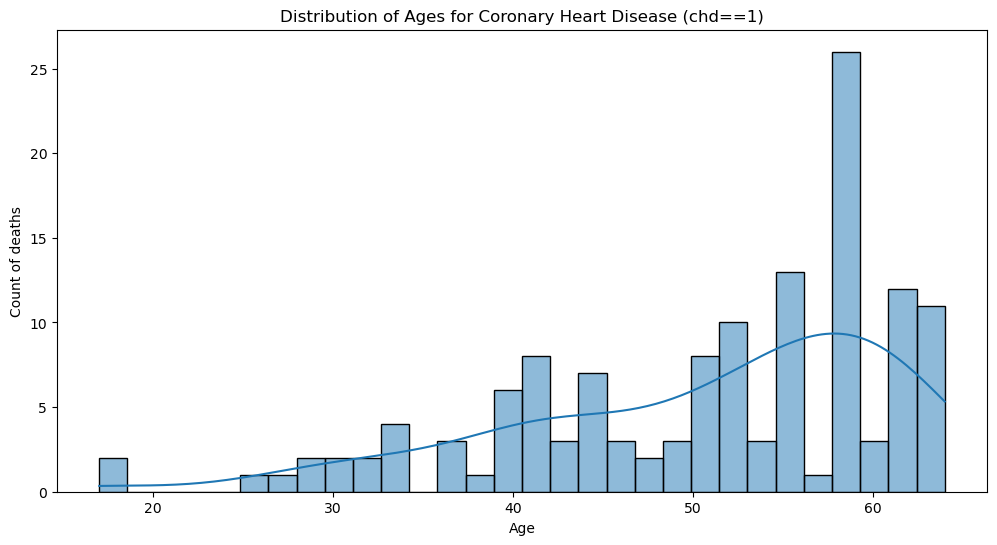

In [102]:
chd_1_data = heartTraindf[heartTraindf['chd'] == 1]

# Plotting the distribution of ages for chd==1
plt.figure(figsize=(12, 6))
sns.histplot(data=chd_1_data, x='age', bins=30, kde=True)
plt.title('Distribution of Ages for Coronary Heart Disease (chd==1)')
plt.xlabel('Age')
plt.ylabel('Count of deaths')
plt.show()

To find a relationship between deaths and ages, we first filtered data that are `chd == 1`, which indicates the dead. Then, we drew a histogram graph to get the insight for the distribution between number of deaths and ages. By observing the histogram above, we could infer that as the age gets older, the number of deaths also increase. The left skewed line shows the number of deaths are more focused on the age group of between 55 years old to 60 years old. 